# Capstone Project - The Battle of Neighborhoods

## New Store Location in UK for a Non-Alcoholic Drink Retailor 

## Introduction

Report(2020) shows a steady increase tendency of expenditure on non-alcoholic drinks in the UK from 2005 (8.4 billion) to 2019 (12.1 billion). Under considering the expected impact of COVID-19, the compound annual growth rate(CAGR) of this market is expected to grow annually by 9.3%, and 40% of expenditure in this market will be attributed to out of home (e.g. cafes, bars) consumption by 2023 in the worldwide context. 

According to the research, there is a notable demand for more premium non-alcoholic drinks in 2017, which is partly driven by UK consumers reducing the spending on alcohol since they began to seek an " adult beverage" that differ from the convention drinks. These secondary data indicate a good opportunity for a startup company to seize the potential market. However, consumers preference and behaviours are changing because of COVID-19 pandemic in the UK, thus, a suitable address is essential for a start-up company post coronavirus.

The data strongly suggests that the best places are in fact areas that are near Restaurants, Cafés and Wine Bars. British are very social people that frequent these place often, so opening new stores in these locations is becoming popular.

The analysis and recommendations for new store locations will focus on general districts with these establishments, not on specific store addresses. Narrowing down the best district options derived from analysis allows for either further research to be conducted, advising agents of the chosen district, or on the ground searching for specific sites by the company's personnel.

## Methodology

### ***Data Analysis***


The data regarding the districts in London needs to be researched and a suitable useable source identified. If it is found but is not in a useable form, data wrangling and cleaning will have to be performed.

The cleansed data will then be used alongside Foursquare data, which is readily available. Foursquare location data will be leveraged to explore or compare districts around Paris, identifying the high traffic areas where consumers go for shopping, dining and entertainment - the areas where the fashion brand are most interested in opening new stores.

   **data source and collection**
    1. Research and find suitable sources for the district data for Paris.
    2. Access and explore the data to determine if it can be manipulated for our purposes.
   **data preparation**
    1. Data Wrangling and Cleaning
   **data analysis and location data**
    1. Foursquare location data will be leveraged to explore or compare districts.
    2. Data manipulation and analysis to derive subsets of the initial data.
    3. Identifying the high traffic areas using data visualisation and tatistical nalysis.
    

### ***Visualisation***
1. Analysis and plotting visualizations.
2. Data visualization using various mapping libraries.

Import required libraries or packages

In [1]:
# Import libraries
import numpy as np # library to handle data in a vectorized manner
import json # library to handle JSON files
import pandas as pd

!conda install -c conda-forge geopy --yes 
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as colors

from bs4 import BeautifulSoup

# Import k-means from clustering stage
from sklearn.cluster import KMeans

!conda install -c conda-forge folium=0.5.0 --yes 
import folium # map rendering library

print('Libraries imported.')

Solving environment: done

## Package Plan ##

  environment location: /opt/conda/envs/Python36

  added / updated specs: 
    - geopy


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    geographiclib-1.50         |             py_0          34 KB  conda-forge
    geopy-1.22.0               |     pyh9f0ad1d_0          63 KB  conda-forge
    ------------------------------------------------------------
                                           Total:          97 KB

The following NEW packages will be INSTALLED:

    geographiclib: 1.50-py_0           conda-forge
    geopy:         1.22.0-pyh9f0ad1d_0 conda-forge


geographiclib-1.50   | 34 KB     | ##################################### | 100% 
geopy-1.22.0         | 63 KB     | ##################################### | 100% 
Preparing transaction: done
Verifying transaction: done
Executing transaction: done
Solving environment: done

# All re

## Data Processing

In [28]:
# Download the dataset and read it into a pandas dataframe.

# The Arrondissements dataset was downloaded from Paris|DATA:  https://opendata.paris.fr/explore/dataset/arrondissements/table/?dataChart
# Then placed on the GitHub repo for the project.
# https://raw.githubusercontent.com/AR-data-science/Coursera_Capstone/master/Arrondissements_.csv

# Download the dataset and read it into a pandas dataframe.

# The Arrondissements dataset was downloaded from Paris|DATA:  https://opendata.paris.fr/explore/dataset/arrondissements/table/?dataChart
# Then placed on the GitHub repo for the project.
# https://raw.githubusercontent.com/AR-data-science/Coursera_Capstone/master/Arrondissements_.csv

paris = pd.read_csv('https://raw.githubusercontent.com/AR-data-science/Coursera_Capstone/master/Arrondissements_.csv')
paris

,CAR,NAME,NSQAR,CAR.1,CARINSEE,LAR,NSQCO,SURFACE,PERIMETRE,Geometry_X,Geometry_Y
0,3,Temple,750000003,3,3,3eme Ardt,750001537,1170882828,4519264,48.862872,2.360001
1,19,Buttes-Chaumont,750000019,19,19,19eme Ardt,750001537,6792651129,11253182,48.887076,2.384821
2,14,Observatoire,750000014,14,14,14eme Ardt,750001537,5614877309,10317483,48.829245,2.326542
3,10,Entrepot,750000010,10,10,10eme Ardt,750001537,2891739442,6739375,48.876130,2.360728
4,12,Reuilly,750000012,12,12,12eme Ardt,750001537,16314782637,24089666,48.834974,2.421325
5,16,Passy,750000016,16,16,16eme Ardt,750001537,16372542129,17416110,48.860392,2.261971
6,11,Popincourt,750000011,11,11,11eme Ardt,750001537,3665441552,8282012,48.859059,2.380058
7,2,Bourse,750000002,2,2,2eme Ardt,750001537,991153745,4554104,48.868279,2.342803
8,4,Hotel-de-Ville,750000004,4,4,4eme Ardt,750001537,1600585632,5420908,48.854341,2.357630
9,17,Batignolles-Monceau,750000017,17,17,17eme Ardt,750001537,5668834504,10775580,48.887327,2.306777


### Wrangling and Cleaning

In [3]:
# Rename the necessary columns 'Geometry_X and Geometry_Y' etc...

# District : name of the central District for the Arrondissement
# Arrondissement : the Arrondissement or district number which is used to identify it
# Arrondissement_Fr : the descriptive French label for each Arrondissement

paris.rename(columns={'NAME': 'Neighborhood ', 'CAR': 'Arrondissement_Num', 'Geometry_X': 'Latitude', 'Geometry_Y': 'Longitude',  'LAR': 'French_Name'}, inplace=True)
paris

,Arrondissement_Num,Neighborhood,NSQAR,CAR.1,CARINSEE,French_Name,NSQCO,SURFACE,PERIMETRE,Latitude,Longitude
0,3,Temple,750000003,3,3,3eme Ardt,750001537,1170882828,4519264,48.862872,2.360001
1,19,Buttes-Chaumont,750000019,19,19,19eme Ardt,750001537,6792651129,11253182,48.887076,2.384821
2,14,Observatoire,750000014,14,14,14eme Ardt,750001537,5614877309,10317483,48.829245,2.326542
3,10,Entrepot,750000010,10,10,10eme Ardt,750001537,2891739442,6739375,48.876130,2.360728
4,12,Reuilly,750000012,12,12,12eme Ardt,750001537,16314782637,24089666,48.834974,2.421325
5,16,Passy,750000016,16,16,16eme Ardt,750001537,16372542129,17416110,48.860392,2.261971
6,11,Popincourt,750000011,11,11,11eme Ardt,750001537,3665441552,8282012,48.859059,2.380058
7,2,Bourse,750000002,2,2,2eme Ardt,750001537,991153745,4554104,48.868279,2.342803
8,4,Hotel-de-Ville,750000004,4,4,4eme Ardt,750001537,1600585632,5420908,48.854341,2.357630
9,17,Batignolles-Monceau,750000017,17,17,17eme Ardt,750001537,5668834504,10775580,48.887327,2.306777


In [4]:
# Clean up the dataset to remove unnecessary columns.
# Some of the columns are for mapping software - not required here.

paris.drop(['NSQAR','CAR.1','CARINSEE','NSQCO','SURFACE', 'PERIMETRE' ], axis=1, inplace=True)
paris

,Arrondissement_Num,Neighborhood,French_Name,Latitude,Longitude
0,3,Temple,3eme Ardt,48.862872,2.360001
1,19,Buttes-Chaumont,19eme Ardt,48.887076,2.384821
2,14,Observatoire,14eme Ardt,48.829245,2.326542
3,10,Entrepot,10eme Ardt,48.876130,2.360728
4,12,Reuilly,12eme Ardt,48.834974,2.421325
5,16,Passy,16eme Ardt,48.860392,2.261971
6,11,Popincourt,11eme Ardt,48.859059,2.380058
7,2,Bourse,2eme Ardt,48.868279,2.342803
8,4,Hotel-de-Ville,4eme Ardt,48.854341,2.357630
9,17,Batignolles-Monceau,17eme Ardt,48.887327,2.306777


### Creating Map

In [6]:
# Retrieve the Latitude and Longitude for Paris
from geopy.geocoders import Nominatim 

address = 'Paris'

# Define the user_agent as Paris_explorer
geolocator = Nominatim(user_agent="Paris_explorer")

location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude

print('The geographical coordinates of Paris France are {}, {}.'.format(latitude, longitude))

The geographical coordinates of Paris France are 48.8566969, 2.3514616.


In [8]:
# create map of Paris using the above latitude and longitude values
map_paris = folium.Map(location=[latitude, longitude], zoom_start=12)


# add markers to map
for lat, lng, label in zip(paris['Latitude'], paris['Longitude'], paris['French_Name']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=25,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.3,
        parse_html=False).add_to(map_paris)  
    
map_paris

### Using Foursqure API

In [9]:
# The code was removed by Watson Studio for sharing.

Your credentails:
CLIENT_ID: 
CLIENT_SECRET:


### Exploratory data analysis

In [10]:
# Explore the first Neighborhood in our dataframe.
# Get the Neighborhood's French name.

paris.loc[0, 'French_Name']
paris.loc[0, 'French_Name']

'3eme Ardt'

### The first arrondissement is identified as 3eme Ardt

In [11]:
# Get the Neighborhood's latitude and longitude values.

neighborhood_latitude = paris.loc[0, 'Latitude'] # Neighborhood latitude value
neighborhood_longitude = paris.loc[0, 'Longitude'] # Neighborhood longitude value

neighborhood_name = paris.loc[0, 'French_Name'] # Neighborhood name

print('Latitude and longitude values of the neighborhood {} are {}, {}.'.format(neighborhood_name, 
                                                               neighborhood_latitude, 
                                                               neighborhood_longitude))

Latitude and longitude values of the neighborhood 3eme Ardt are 48.86287238, 2.3600009859999997.


### Get the top 100 venues that are in the neighborhood 3eme Ardt within a radius of 500 meters

In [12]:
LIMIT = 100 # limit of number of venues returned by Foursquare API
radius = 500 # define radius

url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    neighborhood_latitude, 
    neighborhood_longitude, 
    radius, 
    LIMIT)
url # displays the URL


'https://api.foursquare.com/v2/venues/explore?&client_id=CFYGZIDT4QLNKQH2FWNBXHYMLP4MCY3K3OZDTP51XXJ3NQO0&client_secret=MMO1OTZ5AYFLAAXSFYYSJSMZJ35WZW0HP3XSNXWQONLI1AIW&v=20180605&ll=48.86287238,2.3600009859999997&radius=500&limit=100'

In [13]:
# Send the GET request and examine the resutls

results = requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '5ee27e5fb5ee8f21751a8401'},
 'response': {'suggestedFilters': {'header': 'Tap to show:',
   'filters': [{'name': 'Open now', 'key': 'openNow'}]},
  'headerLocation': 'Enfants-Rouges',
  'headerFullLocation': 'Enfants-Rouges, Paris',
  'headerLocationGranularity': 'neighborhood',
  'totalResults': 91,
  'suggestedBounds': {'ne': {'lat': 48.8673723845, 'lng': 2.3668285468065267},
   'sw': {'lat': 48.8583723755, 'lng': 2.353173425193473}},
  'groups': [{'type': 'Recommended Places',
    'name': 'recommended',
    'items': [{'reasons': {'count': 0,
       'items': [{'summary': 'This spot is popular',
         'type': 'general',
         'reasonName': 'globalInteractionReason'}]},
      'venue': {'id': '4d974096a2c654814aa6d353',
       'name': 'Mmmozza',
       'location': {'address': '57 rue de Bretagne',
        'lat': 48.86391016055883,
        'lng': 2.360590696334839,
        'labeledLatLngs': [{'label': 'display',
          'lat': 48.8639101605588

Structure the json file into a pandas dataframe

In [15]:
# define a function that extracts the category of the venue

def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

# clean the json and structure it into a pandas dataframe.
venues = results['response']['groups'][0]['items']
    
nearby_venues = json_normalize(venues) # flatten JSON

# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues =nearby_venues.loc[:, filtered_columns]

# filter the category for each row
nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

# clean columns
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

nearby_venues.head(20)

,name,categories,lat,lng
0,Mmmozza,Sandwich Place,48.863910,2.360591
1,Chez Alain Miam Miam,Sandwich Place,48.862369,2.361950
2,Square du Temple,Park,48.864475,2.360816
3,Marché des Enfants Rouges,Farmers Market,48.862806,2.361996
4,Chez Alain Miam Miam,Sandwich Place,48.862781,2.362064
5,Okomusu,Okonomiyaki Restaurant,48.861453,2.360879
6,Le Burger Fermier des Enfants Rouges,Burger Joint,48.862831,2.362073
7,Hôtel Jules & Jim,Hotel,48.863496,2.357395
8,SoMa,Japanese Restaurant,48.861511,2.362146
9,Les Enfants Rouges,Wine Bar,48.863013,2.361260


### Create a nearby venues function for all the neighborhoods

In [16]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['French_Name', 
                  'Latitude', 
                  'Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [18]:
# Create a new dataframe called paris_venues.

paris_venues = getNearbyVenues(names=paris['French_Name'],
                                   latitudes=paris['Latitude'],
                                   longitudes=paris['Longitude']
                                  )

3eme Ardt
19eme Ardt
14eme Ardt
10eme Ardt
12eme Ardt
16eme Ardt
11eme Ardt
2eme Ardt
4eme Ardt
17eme Ardt
18eme Ardt
1er Ardt
5eme Ardt
7eme Ardt
20eme Ardt
8eme Ardt
9eme Ardt
13eme Ardt
15eme Ardt
6eme Ardt


### Now let's see how many venues were returned for each neighborhood

In [19]:
paris_venues.groupby('French_Name').count()

,Latitude,Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
French_Name,,,,,,
10eme Ardt,100,100,100,100,100,100
11eme Ardt,68,68,68,68,68,68
12eme Ardt,4,4,4,4,4,4
13eme Ardt,62,62,62,62,62,62
14eme Ardt,25,25,25,25,25,25
15eme Ardt,62,62,62,62,62,62
16eme Ardt,10,10,10,10,10,10
17eme Ardt,56,56,56,56,56,56
18eme Ardt,44,44,44,44,44,44


### Calculate how many unique venue categories there are

In [20]:
# Calculate how many unique categories there are.
print('There are {} unique venue categories.'.format(len(paris_venues['Venue Category'].unique())))

There are 198 unique venue categories.


### Analyze each of the Neighborhoods

In [22]:
# Analyze each of the Neighborhoods from the results

# one hot encoding
paris_onehot = pd.get_dummies(paris_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
paris_onehot['Neighborhood'] = paris_venues['French_Name'] 

# move neighborhood column to the first column
fixed_columns = [paris_onehot.columns[-1]] + list(paris_onehot.columns[:-1])
paris_onehot = paris_onehot[fixed_columns]

paris_onehot

,Neighborhood,Afghan Restaurant,African Restaurant,American Restaurant,Antique Shop,Argentinian Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,...,Vegetarian / Vegan Restaurant,Venezuelan Restaurant,Video Game Store,Vietnamese Restaurant,Waterfront,Wine Bar,Wine Shop,Women's Store,Zoo,Zoo Exhibit
0,3eme Ardt,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,3eme Ardt,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3eme Ardt,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3eme Ardt,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,3eme Ardt,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,3eme Ardt,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,3eme Ardt,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,3eme Ardt,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,3eme Ardt,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,3eme Ardt,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


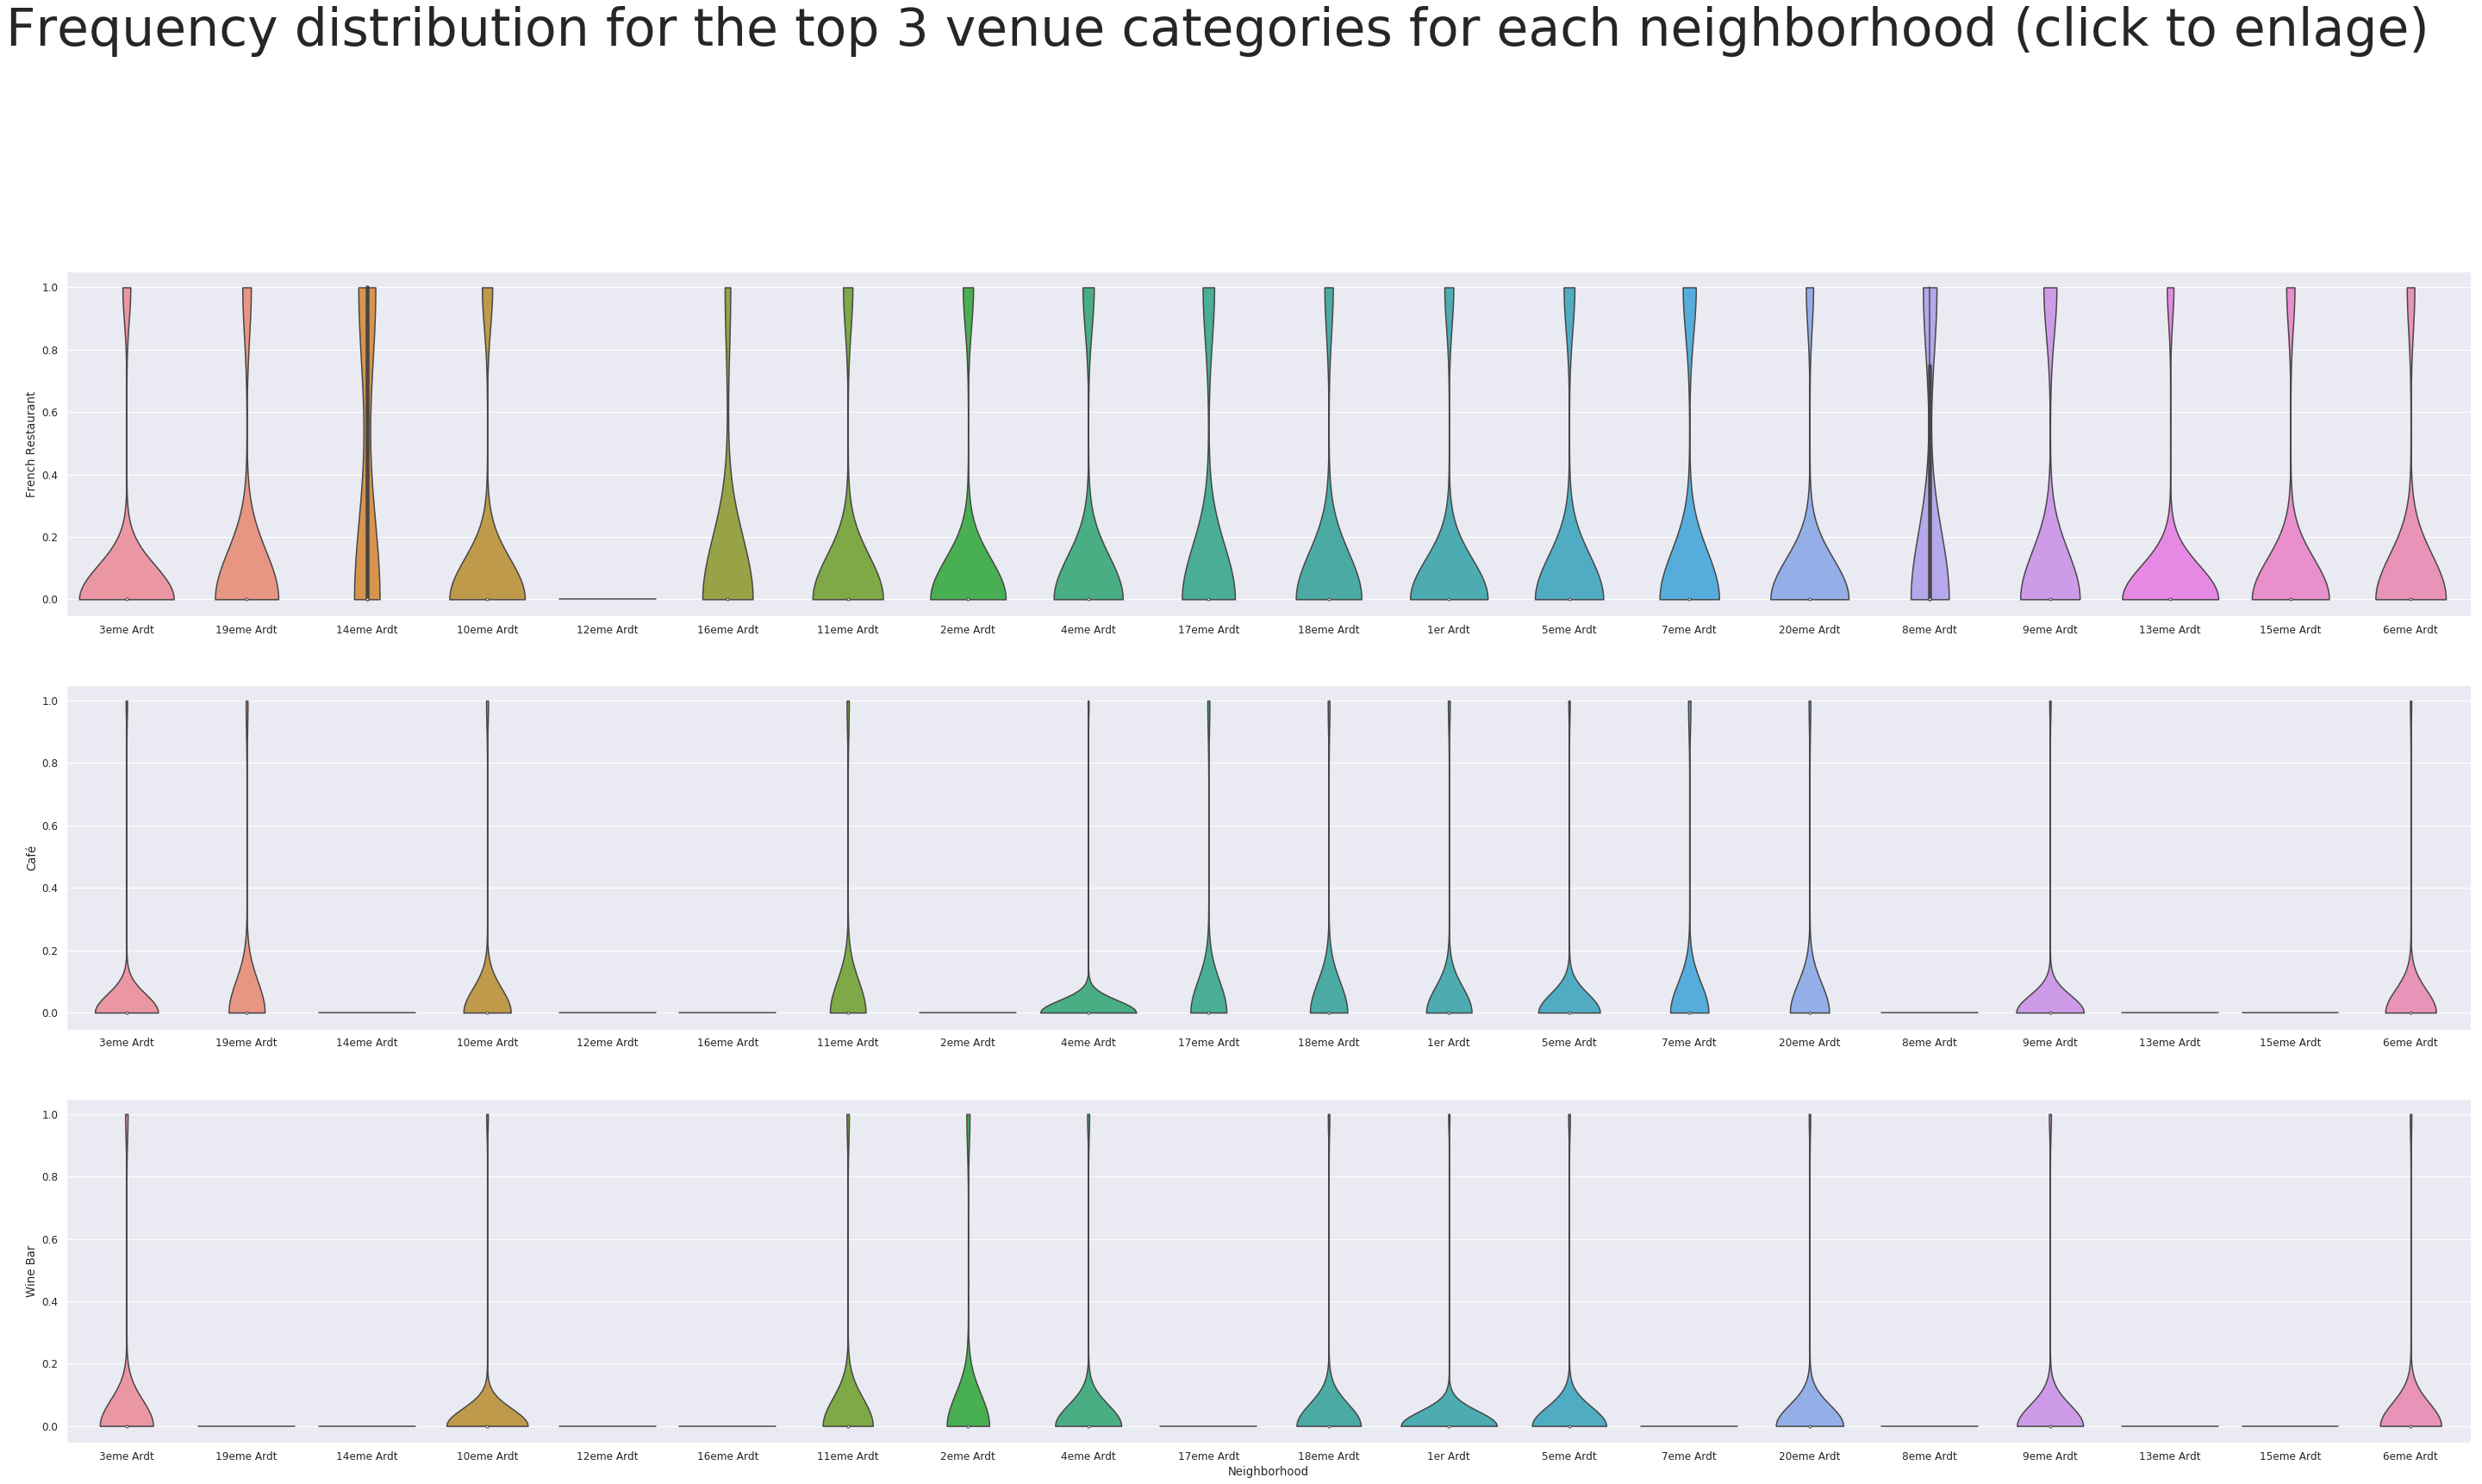

In [23]:
# Explore a plot of this data (a violin plot is used which is a density estimation of the underlying distribution).
# The top 3 venue types as specified by the client for each neighborhood are used for the plotting.

import seaborn as sns

fig = plt.figure(figsize=(50,25))
sns.set(font_scale=1.1)

ax = plt.subplot(3,1,1)
sns.violinplot(x="Neighborhood", y="French Restaurant", data=paris_onehot, cut=0);
plt.xlabel("")

ax = plt.subplot(3,1,2)
sns.violinplot(x="Neighborhood", y="Café", data=paris_onehot, cut=0);
plt.xlabel("")

plt.subplot(3,1,3)
sns.violinplot(x="Neighborhood", y="Wine Bar", data=paris_onehot, cut=0);

ax.text(-1.0, 3.1, 'Frequency distribution for the top 3 venue categories for each neighborhood (click to enlage)', fontsize=60)
plt.savefig ("Distribution_Frequency_Venues_3_categories.png", dpi=240)
plt.show()


### The Neighborhoods

Let's look at the venue category

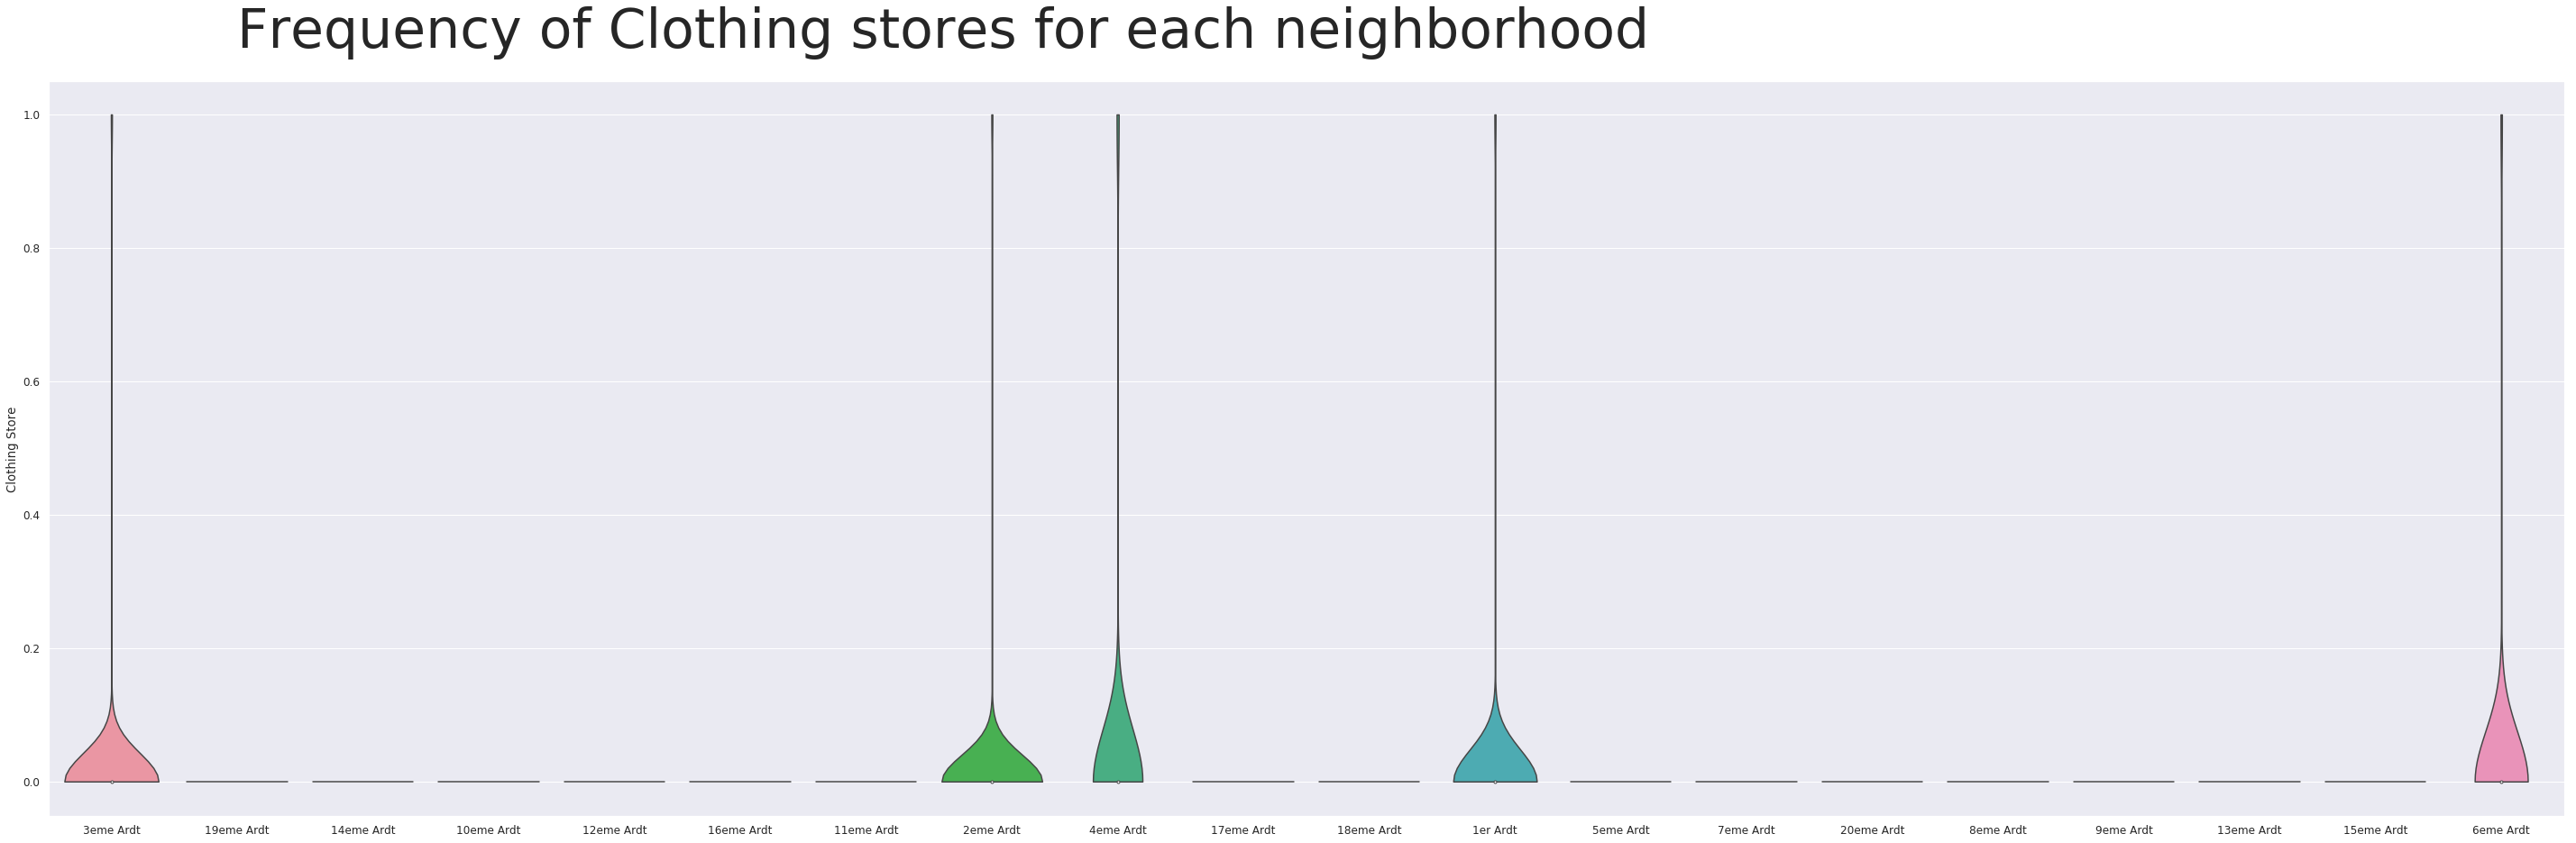

In [24]:
# Add the Clothing_Store to explore this category
import seaborn as sns

fig = plt.figure(figsize=(50,15))
sns.set(font_scale=1.1)

ax = plt.subplot(1,1,1)
sns.violinplot(x="Neighborhood", y="Clothing Store", data=paris_onehot, cut=0);
plt.xlabel("")

ax.text(1.0, 1.1, 'Frequency of Clothing stores for each neighborhood', fontsize=60)
plt.savefig ("Distribution_Frequency_Clothing_Venues.png", dpi=240)
plt.show()

So there are 5 neighborhoods that have a significant frequency density of  stores.

#### Let's add this to the analysis with the other 3 specified categories as below

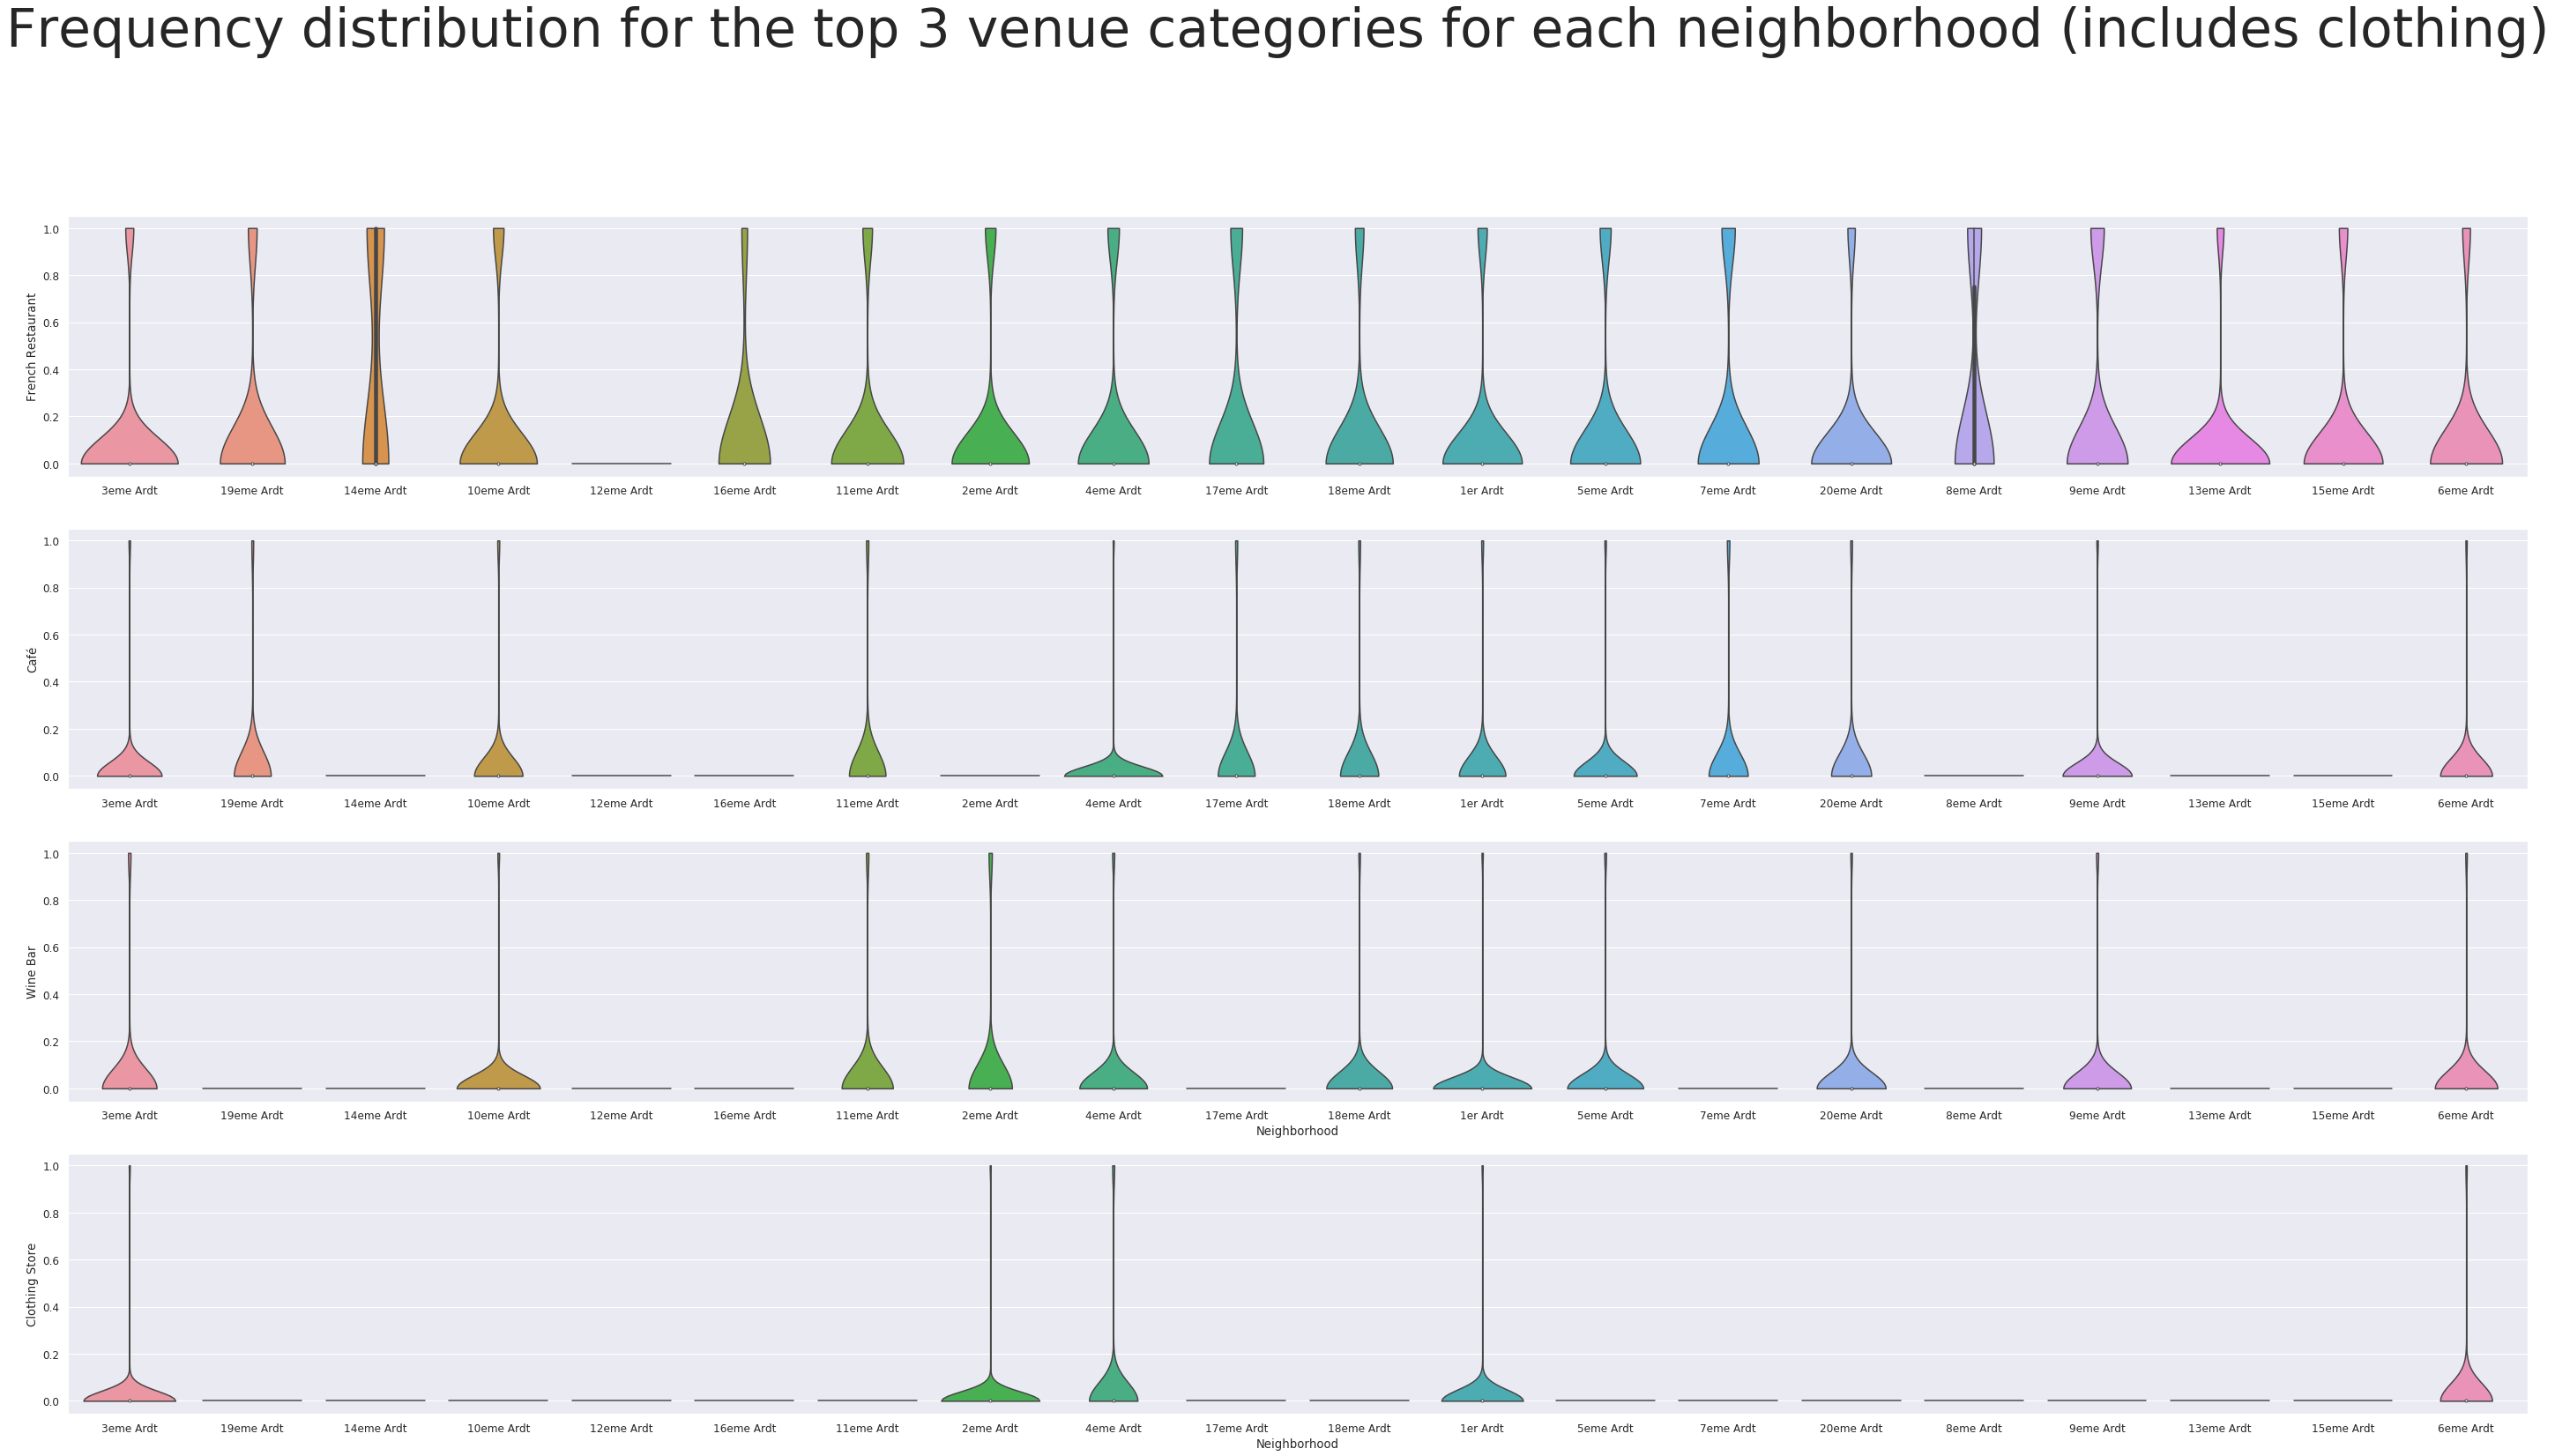

In [25]:
# Clothing_Store has been added to explore this category and make a comparison

import seaborn as sns

fig = plt.figure(figsize=(50,25))
sns.set(font_scale=1.1)

ax = plt.subplot(4,1,1)
sns.violinplot(x="Neighborhood", y="French Restaurant", data=paris_onehot, cut=0);
plt.xlabel("")

ax = plt.subplot(4,1,2)
sns.violinplot(x="Neighborhood", y="Café", data=paris_onehot, cut=0);
plt.xlabel("")

plt.subplot(4,1,3)
sns.violinplot(x="Neighborhood", y="Wine Bar", data=paris_onehot, cut=0);

plt.subplot(4,1,4)
sns.violinplot(x="Neighborhood", y="Clothing Store", data=paris_onehot, cut=0);

ax.text(-1.0, 3.1, 'Frequency distribution for the top 3 venue categories for each neighborhood (includes clothing)', fontsize=60)
plt.savefig ("Distribution_Frequency_Venues_3_categories_clothing.png", dpi=240)
plt.show()

## Discussion

## Chosen Neighborhoods - Results
Inferential analysis using the data, as well as domain knowledge of retail and marketing, allow the list to be focussed to just 3 neighbourhoods from the previous 8.

The reasoning being that if the 3 criteria have been met - identifying neighbourhoods that are lively with Restaurants, Cafés and Wine Bars - adding Clothing Stores into the mix of stores in the area is a significant bonus. Having some of the same category of stores in the same area - especially in fashion retail - is very desirable as a retailer.

So we can increase the criteria to include Restaurants, Cafés, Wine Bars and Clothing Stores - which narrows down and focuses the suggested districts for new stores to be located, and at the same time provides better locations for the brand.

So the final 3 prospective neighborhoods for new store locations are where 4 criteria are met:

**- 3eme Ardt : Arrondissement 3, Temple**
**- 4eme Ardt : Arrondissement 4, Hotel-de-Ville**
**- 6eme Ardt : Arrondissement 6, Luxembourg**

## Let's look at the 3 districts on a  map

In [26]:
# The csv of the 3 chosen prospective neighborhoods was uploaded to GitHub for access and reference
# Download and put into a new dataframe called chosen_districts

chosen_districts = pd.read_csv('https://raw.githubusercontent.com/AR-data-science/Coursera_Capstone/master/Week%205/Chosen.csv')
chosen_districts


,Arrondissement_Num,Neighborhood,French_Name,Latitude,Longitude
0,3,Temple,3eme Ardt,48.862872,2.360001
1,4,Hotel-de-Ville,4eme Ardt,48.854341,2.357630
2,6,Luxembourg,6eme Ardt,48.849130,2.332898


## So Where are our chosen districts?

In [27]:
# Create a folium map of Paris with the 3 neighborhoods superimposed on the map
map_chosen_districts = folium.Map(location=[latitude, longitude], zoom_start=13)

# add markers to map
for lat, lng, label in zip(chosen_districts['Latitude'], chosen_districts['Longitude'], chosen_districts['French_Name']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=45,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.2,
        parse_html=False).add_to(map_chosen_districts)  
    
map_chosen_districts

## Observations
I guess it's not a surprise that these districts are all very centrally located in the circular arrangement of London's arrondissements. Locations fitting the criteria for popular venues would normally be in central locations in many cities of the world.

From this visualisation it is clear that on a practical level, with no data to base decisions on, the circle of the 20 districs is very large, and researching and then visiting them all would be a daunting and time consuming task. We have narrowed the search area down significantly from 20 potential districts to 3 that should suit the client's retail business.

## Inferences
We have made inferences from the data in making the location recommendations, but that is exactly the point. There is no right or wrong answer or conclusion for the task at hand. The job of data analysis here is to steer a course for the location selection of new stores (i) to meet the criteria of being in neighbourhoods that are lively with abundant leisure venues, and (ii) to narrow the search down to just a few of the main areas that are best suited to match the criteria.

## Conclusions

There are many ways this analysis could have been performed based on different methodolgy and perhaps different data sources. I chose the method I selected as it was a straight forward way to narrow down the options, not complicating what is actually simple in many ways – meeting the the critera for the surrounding venues, and in my case, domain knowledge I have on the subject. I originally intended to use the clustering algorythms to cluster the data, but as it progressed it became obvious that this only complicated the task at hand. The analysis and results are not an end point, but rather a starting point that will guide the next part of the process to find specific store locations. The next part will involve domain knowledge of the industry, and perhaps, of the city itself. But the data analysis and resulting recommendations have greatly narrowed down the best district options based on data and what we can infer from it.

Without leveraging data to make focussed decisions, the process could have been drawn out and resulted in new stores opening in sub-standard areas for this retailer. Data has helped to provide a better strategy and way forward, these data-driven decisions will lead to a better solution in the end.

Thanks for taking part in my Data Science journey!